Problem: insurance company needs model to price policies

Source: https://www.kaggle.com/datasets/simranjain17/insurance

0.6124763173969758
0.741192372171448


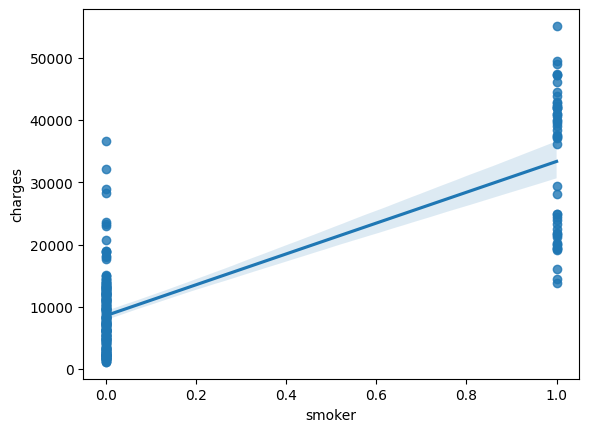

MSE 33004930.066678062
R2 0.7727677521530097
MAE 3953.0174615943574
Mean charges: 13283.524072835822


In [74]:
from sklearn.metrics import mean_absolute_error
import pandas as pd
import sklearn.model_selection
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('insurance.csv')

# convert smoker to binary
smoker_map = {'yes': 1, 'no': 0}
data['smoker'] = data['smoker'].apply(lambda x: smoker_map[x])

# one-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['sex', 'region'])

# set dependent variable as first col for correlation matrix to show good results
cols = ['charges'] + [col for col in data if col != 'charges']
data = data[cols]

# print(data.info())

# todo collinearity - no independent variables appear to have have correlation thus no collinearity (based off correlation matrix)
corr = data.corr()

X_train, X_test = sklearn.model_selection.train_test_split(data, test_size=0.2)

# todo interaction terms?
model = smf.ols(formula='charges ~ smoker', data=X_train).fit()
# print(model.summary())
adj_R2 = model.rsquared
print(adj_R2)

multi_model = smf.ols(formula='charges ~ smoker + age + bmi', data=X_train).fit()
multi_r2 = multi_model.rsquared

# todo p-value analysis
# print(multi_model.summary())
print(multi_r2)

# todo need to run the model on the test data and evaluate the results
from sklearn.metrics import mean_squared_error, r2_score

y_pred = multi_model.predict(X_test)
# todo why is mse so high???
y_test = X_test['charges']

sns.regplot(x='smoker', y='charges', data=X_test)
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE {mse}')
print(f'R2 {r2}')
print(f'MAE {mae}')

mean_charges = sum(y_test) / len(y_test)
print(f'Mean charges: {mean_charges}')
